In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

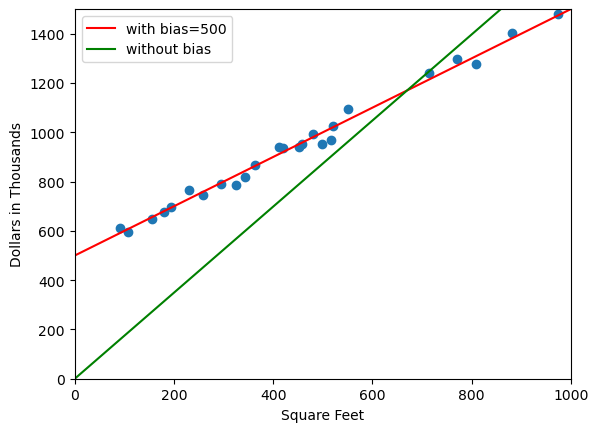

In [20]:
plt.xlim([0, 1000])
plt.ylim([0, 1500])

x = np.random.randint(0, 1000, 25)
y = x + 500 + np.random.randint(-50, 50, 25)
plt.scatter(x, y)


# best fit line
m = 1
b = 500
x = np.linspace(0, 1000, 100)
y = m * x + b
plt.plot(x, y, color="red", label="with bias=500")

# without bias

model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1), y)

m = model.coef_[0]
x = np.linspace(0, 1000, 100)
y = m * x
plt.plot(x, y, color="green", label="without bias")


plt.ylabel("Dollars in Thousands")
plt.xlabel("Square Feet")
plt.legend()
plt.savefig("Figure_1.png")
plt.show()


In [6]:
# Data

x = np.random.randn(20, 1)
y = 10 * x + 25

In [16]:
class LinearRegression():
    def __init__(self, lr=0.01, epochs=10000):
        self.lr = lr
        self.epochs = epochs

    
    def fit(self, x, y):
        assert x.shape[0] == y.shape[0] # same number of batches

        x = np.atleast_2d(x)
        y = np.atleast_2d(y)
        self.x = x
        self.y = y

        self.w = np.random.randn(x.shape[1], y.shape[1])
        self.b = np.random.randn(1, y.shape[1]) # B, M but Batch dimension is vectorized

    def solve(self):
        x = np.concatenate((self.x, np.ones(self.x.shape)), axis=1)
        y = self.y
        w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w

    def loss_fn(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def forward(self, x):
        return np.dot(x, self.w) + self.b
    
    def train(self):
        losses = []
        for i in range(self.epochs):
            y_pred = self.forward(self.x)
            loss = self.loss_fn(self.y, y_pred)

            x = self.x
            w = self.w
            b = self.b

            dl_dw = -2 * x.T.dot(y - (x.dot(w) + self.b)) / x.shape[0]
            dl_db = -2 * np.sum(y - (x.dot(w) + b), axis=0) / x.shape[0]

            self.w -= self.lr * dl_dw
            self.b -= self.lr * dl_db

            losses.append(loss)
        self.losses = losses
    
    def plot(self):
        plt.plot(self.losses)
        plt.title("Training Loss")
        plt.ylabel("MSE Loss")
        plt.xlabel("Epochs")
        plt.savefig("Figure_2.png")
        plt.show()


In [17]:
model = LinearRegression()
model.fit(x, y)


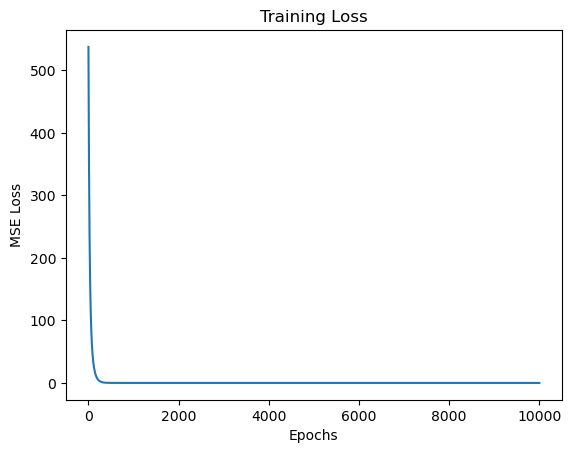

Back prop solution: [[10.]] [[25.]]
Analytical solution: [[10.]
 [25.]]


In [18]:
model.train()
model.plot()
print("Back prop solution:", model.w, model.b)
print("Analytical solution:", model.solve())